# Aula 3.4 - Transformação de atributos

## MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Coleta de dados e Preparação de atributos</span>


## <span style="color:darkred">Transformação de atributos</span>

Material Produzido por Moacir Antonelli Ponti<br>
*colaboração de Eugenio Cabral*

CeMEAI - ICMC/USP São Carlos

---

## Distribuições de variáveis

Variáveis possuem distribuições diferentes de valores possíveis devido a sua natureza.

O senso comum vai assumir que temos uma das distribuições abaixo:

* uniforme

* normal

... e que correlações são sempre:

* lineares

Mas isso nem sempre acontece!

Pode ser útil transformar as variáveis para permitir melhor analisar os dados, inclusive suas correlações em particular com dados de natureza **exponencial**


In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from scipy.stats import norm, skew, skewnorm
from sklearn.preprocessing import PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

# carregando dados
data = pd.read_csv("./dados/municipios_mba.csv")
data.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa


Vamos estudar as variáveis abaixo, exibindo seus gráficos de caixa.

<Axes: >

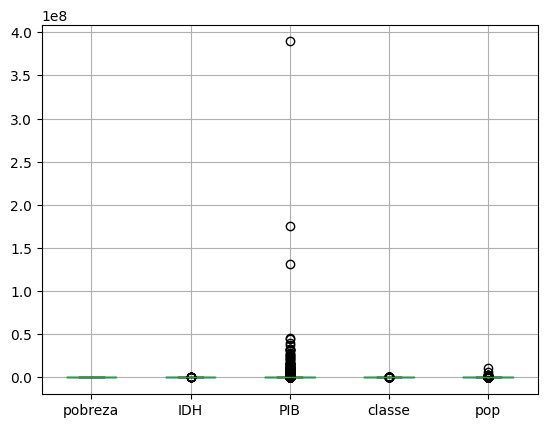

In [2]:
attrs = ['pobreza', 'IDH', 'PIB', 'classe', 'pop']
attrs_cat = attrs + ['UF', 'nome']
data.boxplot(attrs)

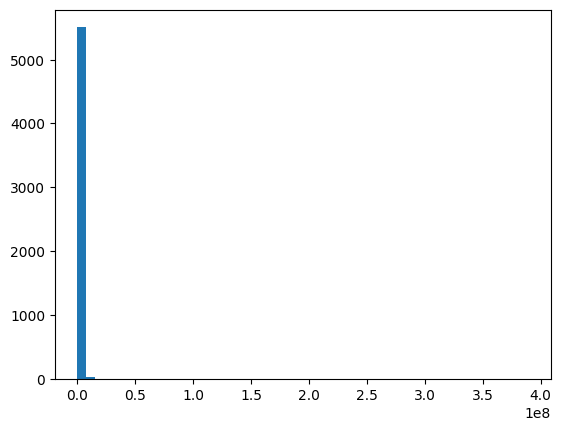

In [3]:
h = plt.hist(data['PIB'], bins=50)
plt.show()

Parece difícil entender a variável PIB!

Talvez se aplicarmos uma transformação **logaritmica**!

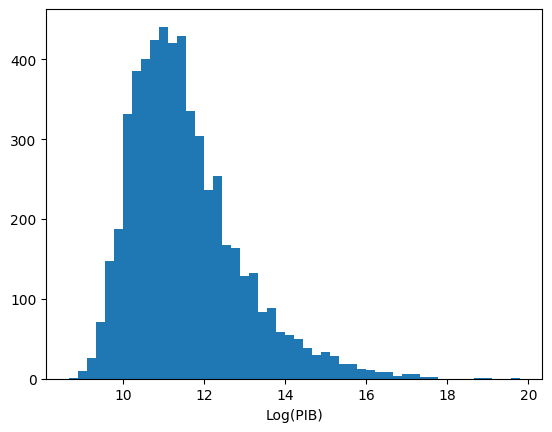

In [4]:
x_PIB = np.array(data['PIB'])

h = plt.hist(np.log(x_PIB+1), bins=50); plt.xlabel('Log(PIB)')

data['Log_PIB'] = np.log(x_PIB+1)
plt.show()

O log é o inverso da função exponencial e assim, isso busca linearizar os dados exponenciais.

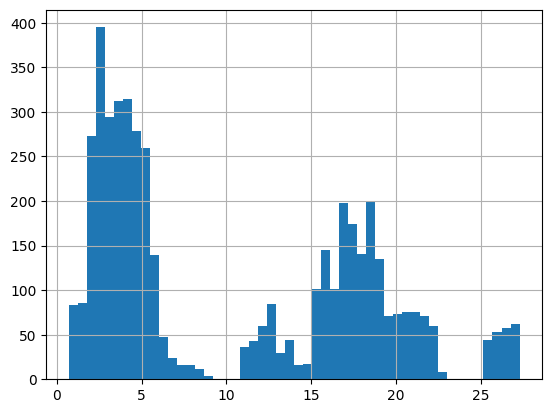

In [5]:
data['pobreza'].hist(bins=50)
plt.show()

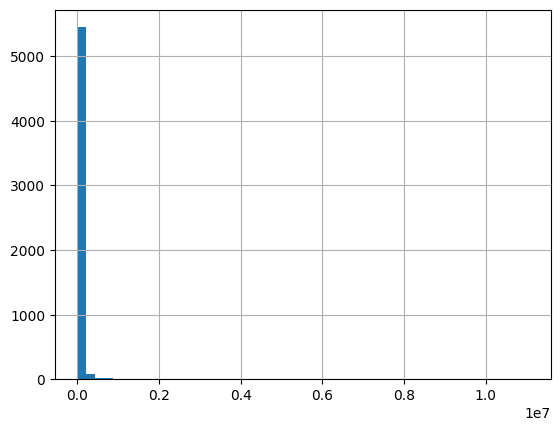

In [6]:
data['pop'].hist(bins=50)
plt.show()

Outra função comumente utilizada (essa para linearizar dados de natureza quadrática),  é a **raiz quadrada.**

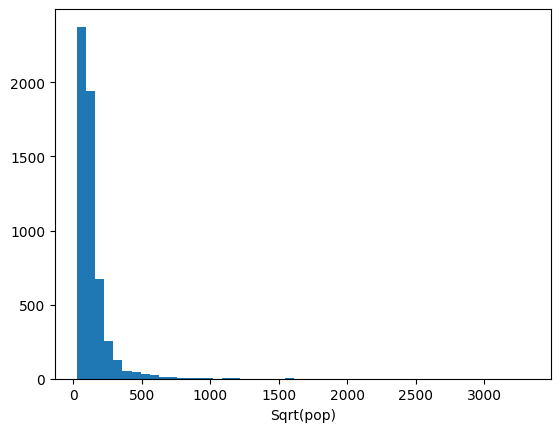

In [7]:
x_pop = np.array(data['pop'])
h = plt.hist(np.sqrt(x_pop), bins=50);
plt.xlabel('Sqrt(pop)')

data['Sqrt_pop'] = np.sqrt(x_pop)
attrs = attrs + ['Sqrt_pop']
plt.show()

In [8]:
data['Log_pop'] = np.log(x_pop+1)

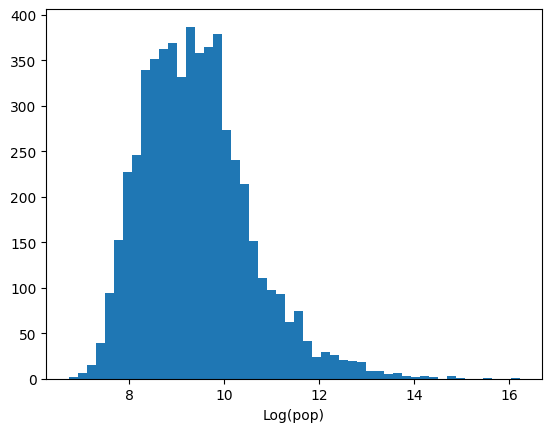

In [9]:
h = plt.hist(data['Log_pop'], bins=50);
plt.xlabel('Log(pop)')
plt.show()

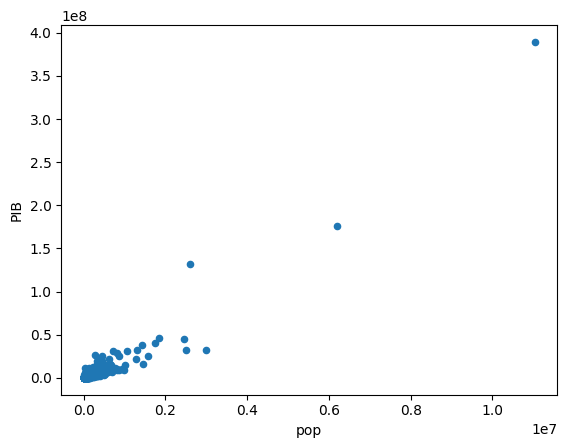

In [10]:
data.plot.scatter(x='pop', y='PIB')
plt.show()

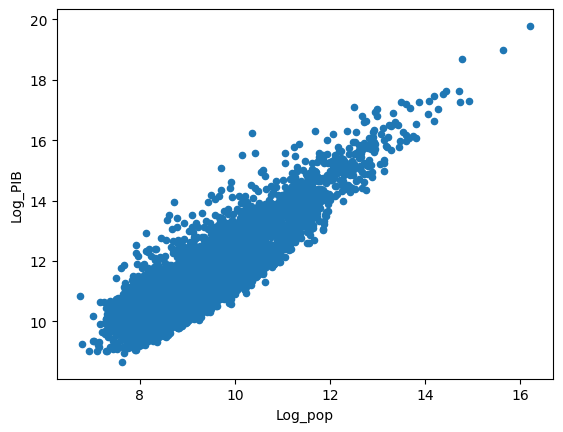

In [11]:
data.plot.scatter(x='Log_pop', y='Log_PIB')
plt.show()

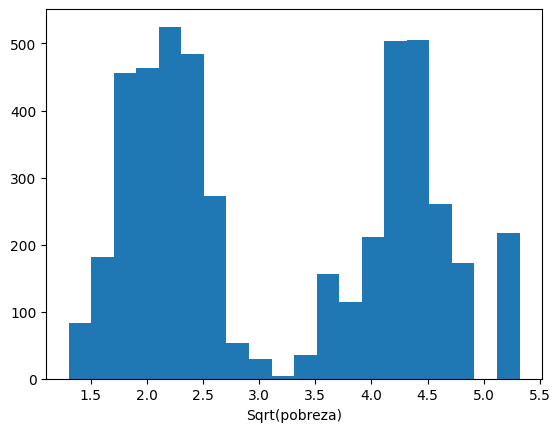

In [12]:
x_pobreza = np.array(data['pobreza'])
h = plt.hist(np.sqrt(x_pobreza+1), bins=20);
plt.xlabel('Sqrt(pobreza)')

data['Sqrt_pobreza'] = np.sqrt(x_pobreza)
plt.show()

In [13]:
attrs = attrs + ['Log_pop', 'Log_PIB']
data[attrs].corr()

,pobreza,IDH,PIB,classe,pop,Sqrt_pop,Log_pop,Log_PIB
pobreza,1.000000,-0.941545,-0.048598,-0.495783,-0.023310,0.010594,0.102731,-0.250301
IDH,-0.941545,1.000000,0.049281,0.417682,0.027717,0.007833,-0.066512,0.216077
PIB,-0.048598,0.049281,1.000000,0.134895,0.951643,0.644769,0.271101,0.291274
classe,-0.495783,0.417682,0.134895,1.000000,0.108764,0.153494,0.077594,0.517440
pop,-0.023310,0.027717,0.951643,0.108764,1.000000,0.777576,0.386149,0.375140
Sqrt_pop,0.010594,0.007833,0.644769,0.153494,0.777576,1.000000,0.828615,0.765424
Log_pop,0.102731,-0.066512,0.271101,0.077594,0.386149,0.828615,1.000000,0.862196
Log_PIB,-0.250301,0.216077,0.291274,0.517440,0.375140,0.765424,0.862196,1.000000


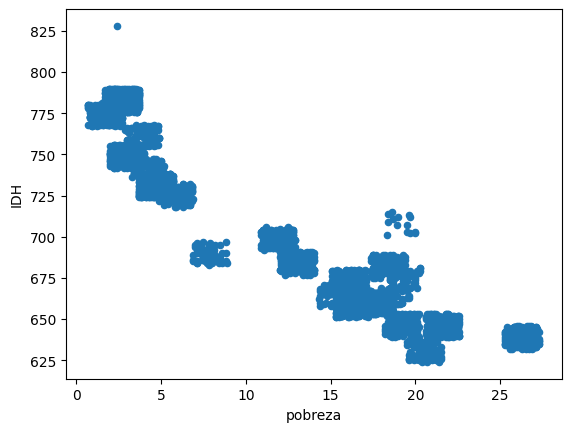

In [14]:
data.plot.scatter(x='pobreza', y='IDH')
plt.show()

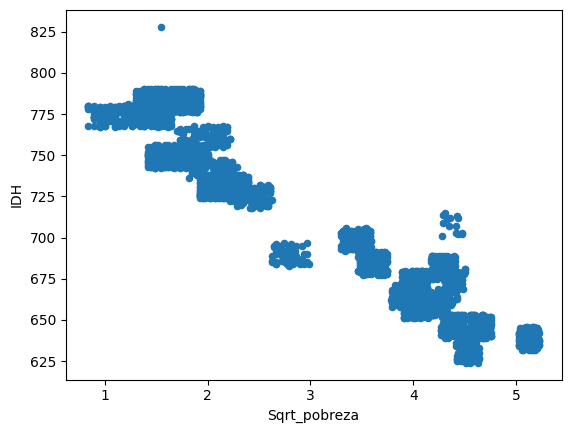

In [15]:
data.plot.scatter(x='Sqrt_pobreza', y='IDH')
plt.show()

### Importante

- Em muitos casos, mais de uma função de transformação pode atingir o mesmo objetivo
- Outras funções como (*e.g.* tan, exp) também podem ser usadas


### Assimetria (obliquidade ou *skewness*)

Intervalos de assimetria são simplificações que podem facilitar o entendimento com relação à normalidade dos dados

- assimetria $\sim0$: Normalmente distribuida (ou perfeitamente simétrica)
- assimetria $< 0$: Maior concentração de dados na cauda esquerda da densidade
- assimetria $> 0$: Maior concentração de dados na cauda direita da densidade
<table>
    <thead>
        <tr>
            <th width="200px">Intervalos</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>$[-0.5, 0.5]$</td>
            <td>Aproximadamente simétrica</td>
        </tr>
        <tr>
            <td>$[-1.0,-0.5]$ ou $[0.5,1.0]$</td>
            <td>Moderadamente assimétrica</td>
        </tr>
        <tr>
            <td>$[-∞,-1.0]$ ou $[1.0,∞]$</td>
            <td>Altamente assimétrica</td>
        </tr>
    </tbody>
</table>

In [16]:
normal = np.random.normal(loc=0, scale=1, size=1000)

low_pos = skewnorm.rvs(a=1, loc=0, scale=1, size=1000)
low_neg = skewnorm.rvs(a=-1, loc=0, scale=1, size=1000)

mid_pos = skewnorm.rvs(a=3, loc=0, scale=1, size=1000)
mid_neg = skewnorm.rvs(a=-3, loc=0, scale=1, size=1000)

high_pos = skewnorm.rvs(a=20, loc=0, scale=1, size=1000)
high_neg = skewnorm.rvs(a=-20, loc=0, scale=1, size=1000)

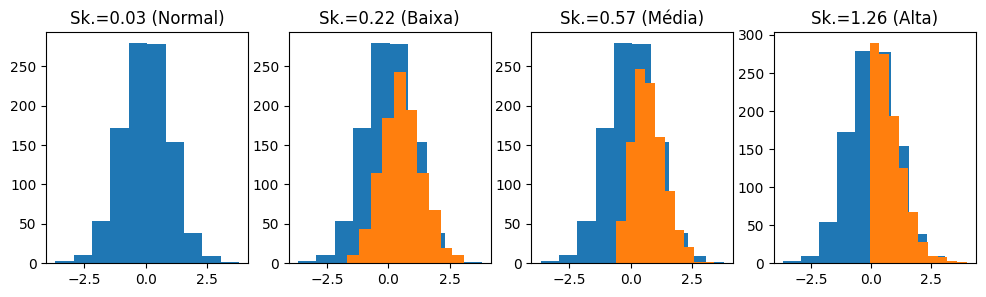

In [17]:
plt.figure(figsize=(12,3))
plt.subplot(141)
plt.hist(normal);#plt.hist(low_pos)#;plt.hist(low_neg)
plt.title('Sk.={:.2f} (Normal)'.format(skew(normal)))
plt.subplot(142)
plt.hist(normal);plt.hist(low_pos)#; plt.hist(high_neg)
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos)))
plt.subplot(143)
plt.hist(normal);plt.hist(mid_pos)#; plt.hist(mid_neg)
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos)))
plt.subplot(144)
plt.hist(normal);plt.hist(high_pos)#; plt.hist(high_neg)
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos)))
plt.show()

### Transformações
<table>
    <thead>
        <tr>
            <th width="100px">Nível</th>
            <th width="150px">Assimetria Positiva</th>
            <th width="200px">Assimetria Negativa</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Baixa</td>
            <td>$\sqrt{x + c}$</td>
            <td>$\sqrt{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Moderada</td>
            <td>$log_{10}~x + c$</td>
            <td>$log_{10}~{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Alta</td>
            <td>$\frac{1}{x + c}$</td>
            <td>$\frac{1}{\max(x+c) - x}$</td>
        </tr>
    </tbody>
</table>

In [18]:
low_pos_tf = np.sqrt(low_pos + 3)
mid_pos_tf = np.log10(mid_pos + 3)
high_pos_tf = 1 / (high_pos + 3)

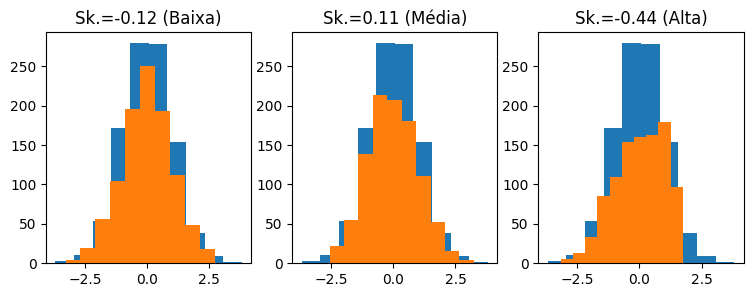

In [19]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.hist(normal);plt.hist(scale(low_pos_tf))
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos_tf)))
plt.subplot(132)
plt.hist(normal);plt.hist(scale(mid_pos_tf))
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos_tf)))
plt.subplot(133)
plt.hist(normal);plt.hist(scale(high_pos_tf))
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos_tf)))
plt.show()

### Powertransformer (*sklearn*)

Método para transformação automática para distribuições assimétricas. 

Não deve ser usado de forma cega, mas tem bons resultados em geral

Box-Cox: exige dados positivos<br>
Yeo-Johnson: permite dados negativos

In [20]:
df = pd.DataFrame({
    'low_pos': low_pos,
    'low_neg': low_neg,
    'mid_pos': mid_pos,
    'mid_neg': mid_neg,
    'high_pos': high_pos,
    'high_neg': high_neg
})

pf = PowerTransformer(method='yeo-johnson', standardize=True) # ou box-cox

df_tf = pf.fit_transform(df[df.columns])

low_pos_tf = df_tf[:,0]
low_neg_tf = df_tf[:, 1]

mid_pos_tf = df_tf[:, 2]
mid_neg_tf = df_tf[:, 3]

high_pos_tf = df_tf[:, 4]
high_neg_tf = df_tf[:, 5]

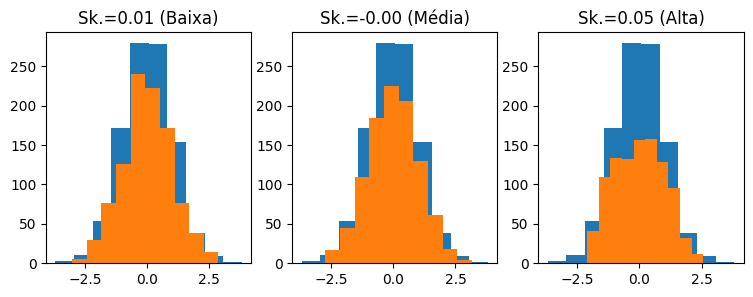

In [21]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.hist(normal);plt.hist(scale(low_pos_tf))
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos_tf)))
plt.subplot(132)
plt.hist(normal);plt.hist(scale(mid_pos_tf))
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos_tf)))
plt.subplot(133)
plt.hist(normal);plt.hist(scale(high_pos_tf))
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos_tf)))
plt.show()

### Resumo:

* Encontrar transformações nos atributos permite novas interpretações, para além do que temos como intuição 

* Transformações não excluem a limpeza e tratamento de dados 

* Transformações podem funcionar como geradores de novos atributos

* A assimetria pode ser usada para estudar as distribuições, e planejadas transformações para obter dados mais próximos de distribuições normais